In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
laptimes_df = pd.read_csv('F1KaggleData/laptimes.csv')
races_df = pd.read_csv('F1KaggleData/races.csv')
drivers_df = pd.read_csv('F1KaggleData/drivers.csv')

In [3]:

def enrich_lap_times(races_df, laptimes_df, drivers_df):

    races_narrow_df = races_df[['raceId', 'year', 'name']]
    drivers_narrow_df = drivers_df[['driverId','driverRef']]

    enriched_laptimes_df = pd.merge(laptimes_df, races_narrow_df, on='raceId')
    return pd.merge(enriched_laptimes_df, drivers_narrow_df, on='driverId')


enriched_laptimes_df = enrich_lap_times(races_df, laptimes_df, drivers_df)

display(enriched_laptimes_df.sample(10))

,raceId,driverId,lap,position,time,milliseconds,year,name,driverRef
193826,169,37,19,21,1:25.976,85976,2000,Hungarian Grand Prix,rosa
404252,54,32,13,19,1:37.531,97531,2006,Malaysian Grand Prix,klien
316119,52,14,4,10,1:15.899,75899,2007,Brazilian Grand Prix,coulthard
226690,866,818,40,15,1:19.238,79238,2012,Canadian Grand Prix,vergne
196198,349,37,9,15,1:58.438,118438,2010,Belgian Grand Prix,rosa
184023,60,30,3,3,2:27.367,147367,2006,British Grand Prix,michael_schumacher
86586,928,4,12,14,1:51.064,111064,2015,Chinese Grand Prix,alonso
296216,165,35,54,10,1:36.386,96386,2000,Canadian Grand Prix,villeneuve
114354,101,2,11,16,1:16.929,76929,2004,German Grand Prix,heidfeld
69929,885,3,63,1,1:45.795,105795,2013,Monaco Grand Prix,rosberg


In [4]:
import ipywidgets as widgets
from IPython.display import clear_output

min_year = enriched_laptimes_df['year'].min()
max_year = enriched_laptimes_df['year'].max()

year_slider = widgets.IntSlider(
                        min=int(enriched_laptimes_df['year'].min()),
                        max=int(enriched_laptimes_df['year'].max()),
                        step=1,
                        description='Year:',
                        value=2016)

display(year_slider)

grand_prix_names = enriched_laptimes_df['name'].unique()

IntSlider(value=2016, description='Year:', max=2017, min=1996)

In [5]:
display(enriched_laptimes_df.sample(4))

,raceId,driverId,lap,position,time,milliseconds,year,name,driverRef
310890,127,14,7,6,1:28.617,88617,2002,San Marino Grand Prix,coulthard
224148,17,8,20,7,1:42.423,102423,2009,Abu Dhabi Grand Prix,raikkonen
30218,46,17,67,9,1:21.715,81715,2007,Hungarian Grand Prix,webber
278937,223,56,68,4,1:26.952,86952,1997,European Grand Prix,irvine


In [6]:
import matplotlib.pyplot as plt 

def get_driver_laptimes(laptimes_df, year, gp_name):
    
    return laptimes_df.loc[(laptimes_df['year'] == year) & 
                           (laptimes_df['name'] == gp_name)]

def plot_driver_positions_during_race(all_drivers_positions, year, gp_name):
    
    plt.suptitle("Positions on each lap of the {} {}".format(year, gp_name), fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
    
    # position_during_race.set_index('lap', inplace=True)
    # display(position_during_race)
    plt.style.use('seaborn-darkgrid')
    my_dpi=96
    plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
    ax = all_drivers_positions.plot()
    ax.set_ylim(0.5, len(all_drivers_positions.columns) + 1)
    plt.set_xlabel = 'lap'
    plt.set_ylabel = 'position'
    
    # plt.yticks(get_driver_positions_for_lap(all_drivers_positions, 1))
    plt.yticks(np.arange(1, len(all_drivers_positions.columns) + 1, 1), get_driver_positions_for_lap(all_drivers_positions, 1))
    plt.gca().invert_yaxis()
    plt.rcParams["figure.figsize"]=20,20
    plt.show()

NameError: name 'get_driver_positions_for_lap' is not defined

<Figure size 1440x1440 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

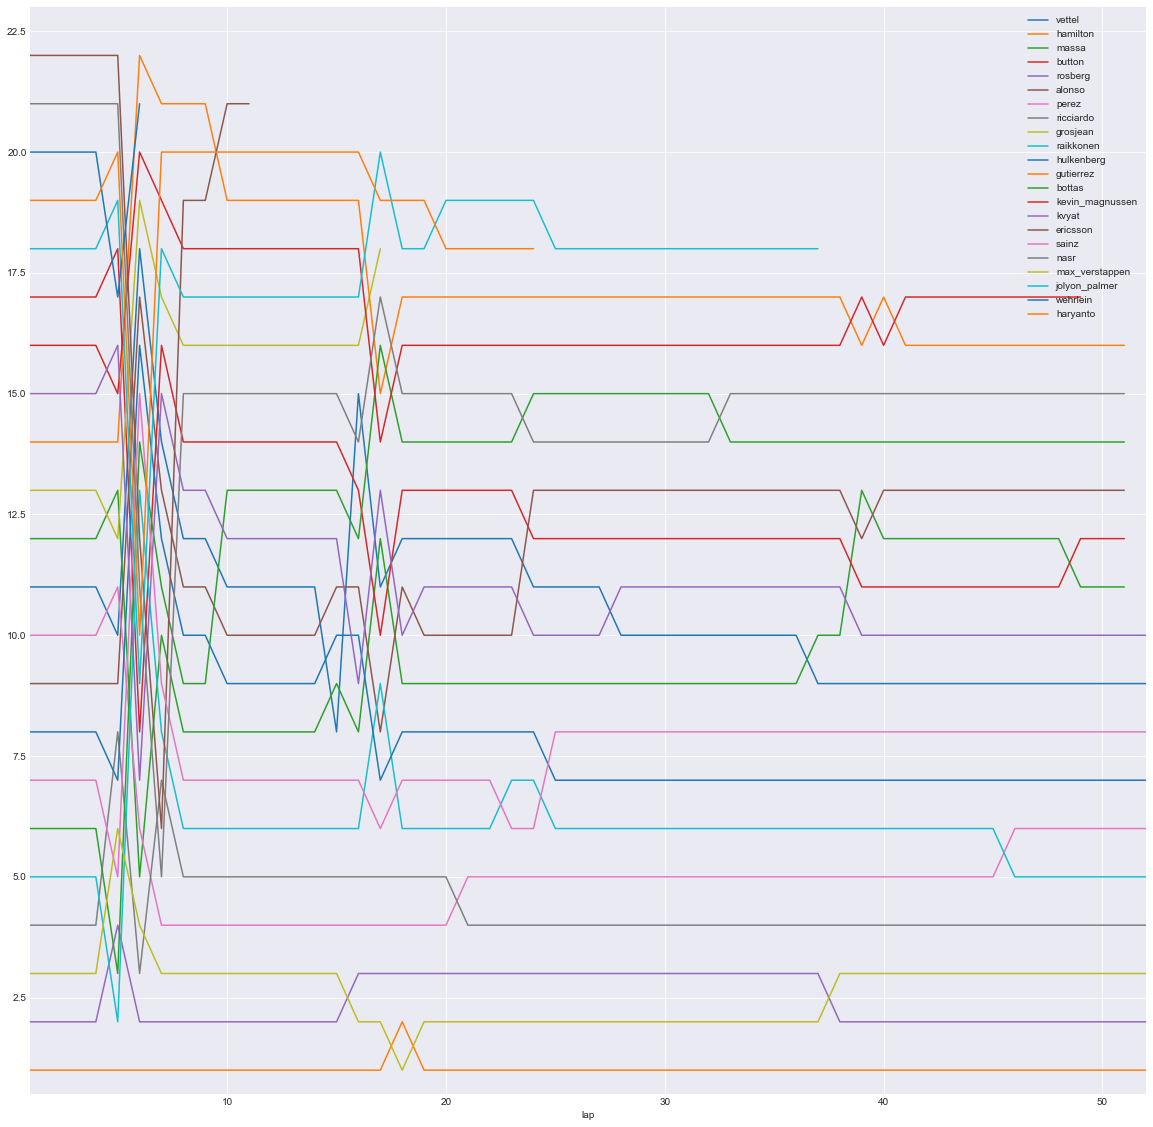

In [7]:
import copy

all_laptimes_for_race_df = get_driver_laptimes(enriched_laptimes_df, 2016, 'British Grand Prix')
# display(all_laptimes_for_race_df)
drivers_who_raced_that_gp = all_laptimes_for_race_df['driverRef'].unique()
# display(drivers_who_raced_that_gp)

all_drivers_positions = pd.DataFrame()

x = True

for driver in drivers_who_raced_that_gp:

    driver_laptimes_df = all_laptimes_for_race_df.loc[(all_laptimes_for_race_df['driverRef'] == driver)]
    race_positions = copy.copy(driver_laptimes_df[['lap', 'position']])
    race_positions.set_index('lap', inplace=True)
    race_positions.rename(columns = {'position':driver}, inplace = True)
    
    if x: 
        all_drivers_positions = race_positions
        x = False
    else:
        all_drivers_positions = pd.merge(all_drivers_positions, race_positions, on='lap', how='left')

       
plt.rcParams["figure.figsize"]=20,20
plot_driver_positions_during_race(all_drivers_positions, 2016, 'British Grand Prix')

In [ ]:
def get_race_id(races_df, year, gp_name):
    
    return int(races_df.loc[(races_df['year'] == year) & (races_df['name'] == gp_name)]['raceId'])

display(get_race_id(races_df, 2016, 'German Grand Prix'))

In [ ]:
results_df = pd.read_csv('F1KaggleData/results.csv')
results_df = pd.merge(results_df[['raceId', 'driverId', 'positionOrder']], drivers_df[['driverId', 'driverRef']], on='driverId')

In [ ]:
# if the driver fails to finish the race, they stop in the position they were as they don't set another lap.   
# However when this happens there might be a cheat which is to look up in the results table for that race and 
# fill in the rest so we get all positions in the correct order for the retirees?
results_for_race = results_df.loc[results_df['raceId'] == get_race_id(races_df, 2016, 'British Grand Prix')]
results_for_race.set_index('driverRef', inplace=True)

for driver in drivers_who_raced_that_gp:
    
    finish_pos = results_for_race.loc[driver]['positionOrder']
    all_drivers_positions.loc[:,driver].fillna(finish_pos, inplace=True)

# display(all_drivers_positions)
plt.rcParams["figure.figsize"]=15,10
plot_driver_positions_during_race(all_drivers_positions, 2016, 'kkkkk')    

In [ ]:
# get the positions on a given lap.  Ideally I want to use this for the first lap so I can label the y ticks correctly as 
# at the moment some of the colours are very similar and being able to trace from the start would be very helpful 

def get_driver_positions_for_lap(all_drivers_positions: pd.DataFrame, lap: int):
    return list(all_drivers_positions.iloc[1].sort_values().index)
    
positions_on_first_lap = get_driver_positions_for_lap(all_drivers_positions, 1)

display(positions_on_first_lap)

x = list(zip(range(1, len(positions_on_first_lap)), positions_on_first_lap))

display(x)

In [ ]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14) })

display(df)

#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# multiple line plot
for column in df.drop('x', axis=1):
   plt.plot(df['x'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)
 
# Now re do the interesting curve, but biger with distinct color
plt.plot(df['x'], df['y5'], marker='', color='orange', linewidth=4, alpha=0.7)
 
# Change xlim
plt.xlim(0,12)
 
# Let's annotate the plot
num=0
for i in df.values[9][1:]:
   num+=1
   name=list(df)[num]
   if name != 'y5':
      plt.text(10.2, i, name, horizontalalignment='left', size='small', color='grey')
 
# And add a special annotation for the group we are interested in
plt.text(10.2, df.y5.tail(1), 'Mr Orange', horizontalalignment='left', size='small', color='orange')
 
# Add titles
plt.title("Evolution of Mr Orange vs other students", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Score")


In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14) })
 
# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # plot every groups, but discreet
    for v in df.drop('x', axis=1):
        plt.plot(df['x'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 
    # Same limits for everybody!
    plt.xlim(0,10)
    plt.ylim(-2,22)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
# general title
plt.suptitle("How the 9 students improved\nthese past few days?", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis title
plt.text(0.5, 0.02, 'Time', ha='center', va='center')
plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

plt.rcParams["figure.figsize"]=100,100

In [ ]:

display(enriched_laptimes_df.sample(10))